# 0.환경설정

In [ ]:
# %git clone https://github.com/Belval/TextRecognitionDataGenerator.git

#git clone https://github.com/DaveLogs/TRDG2DTRB.git

In [ ]:
import os
import subprocess
os.chdir("C:/workspace_project/AIproject/TextRecognitionDataGenerator")

In [ ]:
# %pip install -r requirements.txt

In [ ]:
# %pip install -r requirements-hw.txt

In [ ]:
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
import torch
print(torch.cuda.is_available())

In [ ]:
import os
os.getcwd()

# 1.학습데이터 생성

In [ ]:
import os
import subprocess
os.chdir("C:/workspace_project/AIproject/TextRecognitionDataGenerator/trdg")

In [ ]:
# TextRecognitionDataGenerator 프로젝트를 이용해 한글 학습데이터 생성하기
# TextRecognitionDataGenerator 프로젝트 root에서 실행

# training: 100,00개
!python run.py \
        --output_dir "../.././workspace/step1/trainingpr" \
        --language "ko" \
        --count 200000

In [ ]:
import os
import shutil
import random

# 이미지 파일이 있는 디렉토리
src_dir = "../.././workspace/step1/trainingpr"

# 훈련 데이터와 검증 데이터를 저장할 디렉토리
train_dir = "../.././workspace/step1/trainingprt"
valid_dir = "../.././workspace/step1/validationprt"

# 디렉토리 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
files = os.listdir(src_dir)

# 파일 목록을 무작위로 섞기
random.shuffle(files)

# 80-20 비율로 나누기
split_idx = int(len(files) * 0.8)
train_files = files[:split_idx]
valid_files = files[split_idx:]

# 파일을 훈련 데이터와 검증 데이터 디렉토리로 이동
for file in train_files:
    shutil.move(os.path.join(src_dir, file), train_dir)

for file in valid_files:
    shutil.move(os.path.join(src_dir, file), valid_dir)

# 2.학습데이터 변환

In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/TRDG2DTRB')
os.getcwd()

In [ ]:
# TRDG2DTRB 프로젝트를 이용해 한글 학습데이터 변환하기
# TRDG2DTRB 프로젝트 root에서 실행

# train 학습데이터 변환
!python convert.py \
        --input_path ".././workspace/step1/trainingprt" \
        --output_path ".././workspace/step2/trainingprt"

# validation 학습데이터 변환
!python convert.py \
        --input_path ".././workspace/step1/validationprt" \
        --output_path ".././workspace/step2/validationprt"

# # test 학습데이터 변환
# !python3 convert.py \
#         --input_path ".././workspace/step1/testprt" \
#         --output_path ".././workspace/step2/testprt"

In [ ]:
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

In [ ]:
%pip install fire lmdb

In [ ]:
# deep-text-recognition-benchmark 프로젝트로 학습데이터를 lmdb포맷으로 변환
# deep-text-recognition-benchmark 프로젝트 root에서 실행

# training 데이터 변환
!python create_lmdb_dataset.py \
        --inputPath ".././workspace/step2/trainingprt/" \
        --gtFile ".././workspace/step2/trainingprt/gt.txt" \
        --outputPath ".././workspace/step3/trainingprt"

# validation 데이터 변환
!python create_lmdb_dataset.py \
        --inputPath ".././workspace/step2/validationprt/" \
        --gtFile ".././workspace/step2/validationprt/gt.txt" \
        --outputPath ".././workspace/step3/validationprt"

# test 데이터 변환
!python create_lmdb_dataset.py \
        --inputPath ".././workspace/step2/testprt/" \
        --gtFile ".././workspace/step2/testprt/gt.txt" \
        --outputPath ".././workspace/step3/testprt"

# 3.커스텀모델 학습

In [ ]:
%pip install natsort nltk

In [ ]:
# deep-text-recognition-benchmark 프로젝트를 이용한 모델 학습
# deep-text-recognition-benchmark 프로젝트 root에서 실행
!python train.py \
        --train_data ".././workspace/step3/trainingprt" \
        --valid_data ".././workspace/step3/validationprt" \
        --select_data / \
        --batch_ratio 1 \
        --Transformation None  \
        --FeatureExtraction "VGG" \
        --SequenceModeling "BiLSTM" \
        --Prediction  "CTC" \
        --input_channel 1 \
        --output_channel 256 \
        --hidden_size 256 \
        --saved_model ".././workspace/pre_trained_model/korean_g2.pth" \
        --FT

In [ ]:
CUDA_VISIBLE_DEVICES=0,1,2
!python train.py \
        --train_data ".././workspace/step3/trainingprt" \
        --valid_data ".././workspace/step3/validationprt" \
        --select_data / \
        --batch_ratio 1 \
        --batch_size 64 \
	--Transformation None  \
        --FeatureExtraction "VGG" \
        --SequenceModeling "BiLSTM" \
        --Prediction  "CTC" \
        --data_filtering_off \
        --workers 0 \
        --imgH 64 \
        --imgW 200 \
        --num_iter 10000 \
        --valInterval 100

3.4 모델 테스트

In [ ]:
os.chdir('C:/workspace_project/AIproject/deep-text-recognition-benchmark')
os.getcwd()

In [ ]:
!python demo.py \
        --Transformation  None \
        --FeatureExtraction VGG \
        --SequenceModeling BiLSTM \
        --Prediction CTC \
        --image_folder demo_image/ \
        --saved_model ./saved_models/None-VGG-BiLSTM-CTC-Seed1111/best_accuracy.pth

# 4.모델 사용하기

In [ ]:
! git clone https://github.com/JaidedAI/EasyOCR.git


In [5]:
import os
os.chdir('C:/workspace_project/AIproject/EasyOCR')

In [9]:
import easyocr

reader = easyocr.Reader(['ko']) # 'en': 영어로 설정
result = reader.recognize('C:/workspace_project/AIproject/workspace/demo_images/04.jpg') 
print(easyocr)

<module 'easyocr' from 'C:\\workspace_project\\AIproject\\EasyOCR\\easyocr\\__init__.py'>


In [15]:
%pip install --upgrade easyocr


Note: you may need to restart the kernel to use updated packages.


In [16]:
!python run.py

filename: '01.jpg', confidence: 0.0360, string: '쁨'
bbox:  [[589, 129], [683, 129], [683, 195], [589, 195]]
filename: '01.jpg', confidence: 0.0127, string: '책'
bbox:  [[503, 209], [625, 209], [625, 277], [503, 277]]
filename: '01.jpg', confidence: 0.0299, string: '웬@'
bbox:  [[645, 211], [763, 211], [763, 273], [645, 273]]
filename: '01.jpg', confidence: 0.0309, string: '80-4@;1861'
bbox:  [[360, 291], [613, 291], [613, 329], [360, 329]]
filename: '01.jpg', confidence: 0.2894, string: '(02)'
bbox:  [[362, 344], [523, 344], [523, 381], [362, 381]]
filename: '01.jpg', confidence: 0.4650, string: '(하'
bbox:  [[702, 322], [901, 322], [901, 383], [702, 383]]
filename: '01.jpg', confidence: 0.0105, string: '뼈다'
bbox:  [[485, 419], [773, 419], [773, 487], [485, 487]]
filename: '01.jpg', confidence: 0.1444, string: '전화; @26-6788'
bbox:  [[359, 502], [603, 502], [603, 542], [359, 542]]
filename: '01.jpg', confidence: 0.5886, string: '00-918-856'
bbox:  [[631, 506], [807, 506], [807, 538], [631,

In [13]:
import torch
print(f"Torch CUDA available? : {torch.cuda.is_available()}")

Torch CUDA available? : True


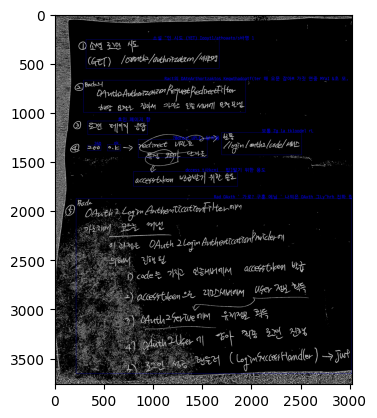

['소설 "인 시도 (YET) Iooytl/athoaato/s바명 1', 'Ract의 DAtnArthortzaktos Keqwthadoatf(ter 해 요문 잡아M 가짓 연중 MYaI &초 모,', '효인 폐이지 향', '보통 Zg la tkloodel rL', '26D', 'ok', '?@drect UPLE ~달라용', 'dccess t사kcni   밥]발기 위한 용도', 'Rad OAxth \' 가로? 구훈 에님 \' 나찌은 DAxth 그Ly"hrh 진하 립 이중서벼이비 accecstkem 밟 \'code들   가지고 리교MMa ULer 쟁 확득 CleSstiksem 요 \'CArthz-cke al어 유M요 확득 피공 원인 진학 OAiith트 Ue 기 \' 4 핸들러 ( 냉"iate;lhondler 구 jwf 그원']


In [17]:
import cv2
import easyocr
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

reader = easyocr.Reader(["ko", "en"], gpu=True)
result = reader.readtext(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/IMG_2129_preprocessed.jpg",
    paragraph=True
)
result2 = reader.readtext(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/IMG_2129_preprocessed.jpg",
    detail=0,
    paragraph=True
)

img = cv2.imread(
    "C:/workspace_project/AIproject/ocr-preprocessor-main/IMG_2129_preprocessed.jpg"
)

img = Image.fromarray(img)

font = ImageFont.truetype('C:/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc', 48)

draw = ImageDraw.Draw(img)

for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]

    draw.rectangle(((x, y), (x + w, y + h)), outline="blue", width=2)
    draw.text((int((x + x + w) / 2), y - 40), str(i[1]), font=font, fill="blue")

plt.imshow(img)
plt.show() 
print(result2)

In [ ]:
import os
os.chdir('C:/workspace_project/AIproject/ocr-preprocessor-main')

In [ ]:
!python main.py